# Is Bitcoin A Profitable Buy?


CMSC320 Final Tutorial


By: Aaron Rodrigues, Aadarsh Patel, Josiah Oriendo

#Contents
1. [Introduction](#scrollTo=BOQw2Xs1VMDz)
2. [Data Curation](#scrollTo=hox2cB7MUEOT)
4. [Exploratory Analysis](#scrollTo=NoWpharGUQgn)
5. [Primary Analysis](#scrollTo=276EFktVUso3)
6. [Visualization](#scrollTo=FOm74PQ1d6nX)
6. [Insights & Conclusions](#scrollTo=6L7I1PCLU4B8)

Group Member Contributions


Member 1: Aaron Rodrigues, Contribution: 100%

Member 2: Aadarsh Patel, Contribution: 100%

Member 3: Josiah Oriendo, Contribution: 100%

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Aaron Rodrigues

Aadarsh Patel

Josiah Oriendo

Contributions Summary

Aaron Rodrigues - came up with idea to something finance related, read in csv file and dropped null rows, explored the relationship between time and price using an ADF test, trained and tested the polynomial regression model, wrote conslusion analysis about the strength of the relationships we found with the variables we have

Aadarsh Patel - came up with idea to work in cryptocurrencies, dropped columns that are not relevant to our project, explored the relationship between volume and bitcoin price using a PCC test, plotted training/testing data and plot for future price predictions, wrote conclusion analysis about what the machine learnings models we developed foundm and why the finds are significant

Josiah Oriendo - came up with the idea to work with bitcoin, converted date column to type datetime, explored the volatility of bitcoin over time using a PCC test, generated polynomial features on the polynomial regression model to predict prices during future dates, wrote conclusion analysis about the insights drawn from our project and recommendations for investors


<a id='introduction'></a>
# Introduction


In recent years, Bitcoin has emerged as both a popular and controversial investment option. This project foucses on assessing the financial viability of the cryptocurrency, seeking to understand its volatility and the patterns behind its price fluctuations. By understanding this, both individual investors and trading professionals will be able to utilize this information to further their financial interests. However, since there is a high reward in trading, there also lies a high risk. Therefore, being able to answer our question of "Is Bitcoin A Profitable Buy?" is an essential first step and we must be as precise as possible when analyzing our data. Through the use of statistical models, we will examine historical price data to explore trends, identify key factors influencing Bitcoin's price movements, and predict future behaviors. This will allow us to equip investors with a clearer understanding of Bitcoin's investment profile, balancing potential gains against the inherent risks.

<a id='data-collection'></a>
# Data Curation

The first step in our data science pipeline begins with selecting a dataset that is most applicable to our situation. In our case, we opted for the Bitcoin Historical Dataset available from Kaggle. This dataset provides comprehensive information about Bitcoin's price throughout trading hours and trading volume over time with data ranging from the end of 2014 all the way to early 2022. The data can be observed at this link: https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd/data



**Required Tools**

Before we can get to all the fancy stuff, we need to ensure we have all the necessary tools to do so. This project requires Python 3.10 and associated python libraries each with links to their user guides if you find yourself curious and wanting to know more:
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html): Enables data analysis by offering data structures to organize and manipulate data
- [Seaborn](https://seaborn.pydata.org/tutorial.html): Tool to create informative graphics for statistics
- [Numpy](https://numpy.org/doc/stable/user/index.html): Allows for scientific computing in programming
- [Matplotlib](https://matplotlib.org/stable/users/index): Facilitates visualization by providing variety of plots
- [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html): Empowers computation by providing staistical tests

**Imports**

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

**Data Loading and Previewing**

In [ ]:
# read csv file
df = pd.read_csv('BTC-Daily.csv', on_bad_lines='skip')
display(df.head(5))
display(df.tail(5))

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2650,1417132800,2014-11-28 00:00:00,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15


**Data Processing: Cleaning Data**


In [ ]:
# drop symbol column & unix column to reduce dimesionality
df = df.drop('unix', axis=1)
df = df.drop('symbol', axis=1)

# convert date col to type datetime
df['date'] = pd.to_datetime(df['date'])

# reverse order of rows, so we can start from older dates and work our way down to more recent dates
df = df.iloc[::-1].reset_index(drop=True)

# drop empty data
df = df.dropna()

print(df.dtypes)
display(df.head(5))
display(df.tail(5))

date          datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
Volume BTC           float64
Volume USD           float64
dtype: object


,date,open,high,low,close,Volume BTC,Volume USD
0,2014-11-28,363.59,381.34,360.57,376.28,3220878.18,8617.15
1,2014-11-29,376.42,386.60,372.25,376.72,2746157.05,7245.19
2,2014-11-30,376.57,381.99,373.32,373.34,1145566.61,3046.33
3,2014-12-01,376.40,382.31,373.03,378.39,2520662.37,6660.56
4,2014-12-02,378.39,382.86,375.23,379.25,2593576.46,6832.53


,date,open,high,low,close,Volume BTC,Volume USD
2646,2022-02-25,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07
2647,2022-02-26,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2648,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2649,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2650,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06


As you can see, we dropped the Unix column, which gave a Unix timestamp for each data entry. In its place, we used the date column provided by the dataset as it did not require any calculations to use. All we had to do was convert the date column to the datetime type which will later enables us to conduct time-based analyses more effectively. Additionally, we reorganized the rows to display the data in chronological order, from oldest to newest making things more coherent when we do time analysis. All our efforts have prepared the way for the data exploration phase.

**Note**: For those unaware of what a Unix time stamp is, it is the time elapsed since the time 00:00:00 UTC on 1 January 1970

# Exploratory Analysis & Data Visualization

The best way to understand the data that we have is to create visualizations and run tests which is why this section will preview a variety of plots, and tests that will seek to answer these three questions:

1) [Does there exist a connection between volatility and time?](#scrollTo=k-EFskp-aiF6)

2) [Is there a relationship between volume and bitcoin close price?](#scrollTo=dyxmkSqDq-xu)

3) [Are price and time correlated?](#scrollTo=hgvb68QxrJyQ)

**Volatility vs. Time**

Understanding the relationship between volatility and time is essential for those who plan to invest. Not only does it help to understand the market, but it also allows one to manage risk. The more volatile that a market is, the more susceptible it is to fluctations in price, but this does not necessarily ascertain increases in price, it could also entail downturns as well, so volatility can be both good and bad. If we want to be able to answer our main driving question of whether or not Bitcoin is worth it, we need to be able to understand Bitcoins volatility overtime.

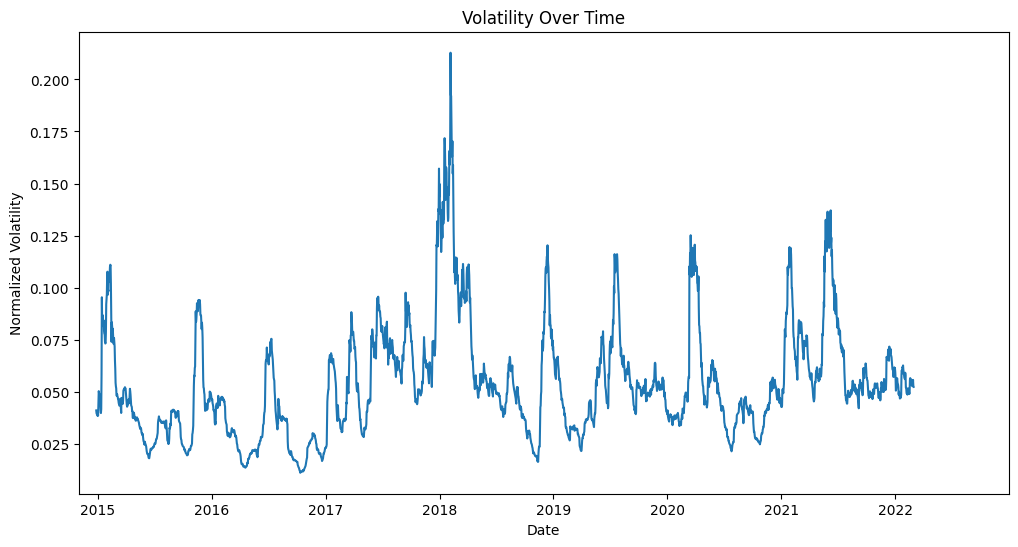

In [ ]:
# Calculate True Range
df['true_range'] = df['high'] - df['low']
df['high_prev_close'] = abs(df['high'] - df['close'].shift(1))
df['low_prev_close'] = abs(df['low'] - df['close'].shift(1))
df['true_range'] = df[['true_range', 'high_prev_close', 'low_prev_close']].max(axis=1)

# Calculate Average True Range
atr = 30 # monthly windows
df['atr'] = df['true_range'].rolling(window=atr).mean()

# Normalize ATR
df['normalized_atr'] = df['atr'] / df['close']

# Plot Normalized
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['normalized_atr'])
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Volatility')
plt.xlim(pd.Timestamp('2014-11-01'), pd.Timestamp('2022-12-31'))  # Set x-axis range from 2014 to 2022
plt.show()


This code previews a calculation of the true range of bitcoin prices, which indicate volatility by considering all of the different ranges of the price of the asset. I then follow up by taking the average true range. As implied in the name, it is simply taking the average of the true range values over a certain window of time. In this code specifically we designated a period to consist of 30 days. Our last calculation was a normalization of the ATC. Since ATC is effected by changes in price, we wanted to be able to look at ATC that was proportional to one another and to do that we divided by the closing price of those days and divided. All in all, average true range is a common concept in trading and is important for one to know to make informed decisions and if you would like to read up on the concept, you can follow this [link](https://www.investopedia.com/terms/a/atr.asp#:~:text=The%20true%20range%20indicator%20is,days%2C%20of%20the%20true%20ranges.).

Observing this graph, there is something that immediately draws a viewers attention, the huge spike in volatility in 2018. This was known as the Great Crypto crash which was came after a big crypto boom in 2017. Many attribute this crash to 3 reasons, Goldman Sachs abandoning its idea to create a crypto trading platform, a crypto whale transfering over twenty-two thousand bitcoint and the selling of more thne one hundred thousand bitcoint to be used in the black market. If interested you can find out more about this crash [here](https://link.springer.com/article/10.1007/s10479-023-05575-0#:~:text=Second%2C%20on%20the%20day%20of,2018d%2C%202018e%2C%202018f.). Aside from that discrepancy, it seems as if there may be a positive relationship between time and volatility. That being said, the eye test is not enough, so let's run a Pearson Correlation Coefficient to confirm what we saw.

**Note**: The pearson correlation coeffecient test is especially applicable here because it is commonly used to measure the strength and direction of the linear relationship between two continuous variables.

Pearson Correlation Coefficient Test:

Null Hypothesis (H<sub>0</sub>): There is no significant relationship between time and volatility.

Alternative Hypothesis (H<sub>A</sub>): There is a positive relationship between time and volatility.



In [ ]:
# Perform one-sample t-test
corr_coefficient, p_value = pearsonr(df['true_range'], df['date'].astype(int))

# Print results
print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.6010011691379652
P-value: 4.119528897681802e-260


Interpretation:

Interesting, the previous statistical test we conducted yielded a coefficient of 0.6 which indicates a moderate positive relationship and a P-value far smaller then the 0.05 significance level. Based on these statistics, we can safely reject the null hypothesis and assume the alternate hypothesis, that there is a positive relationship between time and volatility. Although, we we were able to conclude a positive relationship between these two, this does not mean it is the end all be all for our driving question. As data scientists we need to be able to look at the bigger picture, the relationship between volatility and time is just one piece of the puzzle when it comes to predicting Bitcoin's price movement and this just means there is further tests to be done if we want to arrive at a comprehensive conclusion.

**Volume vs. Close Price**


Understanding the relationship between volume and close price is crucial for traders to understand the activity of the market, to verify price trends, and to be able to identify other patterns in price. High volumes that are backed up by change in price indicate strong market conviction, while on the other hand low volume may indicate hesitancies in the sale of Bitcoin. By analyzing volume alongside price data, market participants can get a better grasp on what they are buying into.







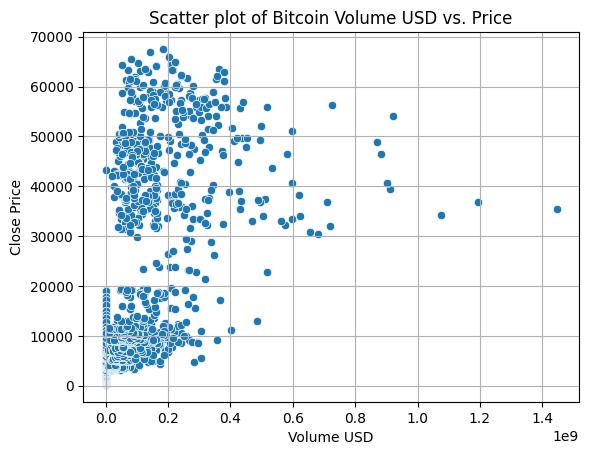

In [ ]:
sns.scatterplot(x='Volume USD', y='close', data=df)
plt.title('Scatter plot of Bitcoin Volume USD vs. Price')
plt.xlabel('Volume USD')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

Based upon this scatterplot, there appears to be a trend, relating volume and bitcoin price. Yet again, our goal is to find the linear relationship between variables which requires the Pearson Correlation Coefficient test.

Pearson Correlation Coefficient test:

Null Hypothesis(H<sub>0</sub>): the volume of bitcoin has correlation with the price of bitcoin

Alternate Hypothesis(H<sub>A</sub>): the volume of bitcoin does have a correlation with the price of bitcoin

In [ ]:
corr_coefficient, p_value = pearsonr(df['Volume USD'], df['close'])

print("P-value:", p_value)
print("PCC:", corr_coefficient)


P-value: 1.5545790163927907e-268
PCC: 0.608672668702703


Interpretation:

Assuming a significance level of 0.05, we see that the p-value we obtained of 1.5545790163927907e-268 is clearly less than 0.05. Hence, we are able to confidently reject the null hypothesis, telling us volume does have a correlation with the price of bitcoin. This is significant because it implies that as the trading volume of Bitcoin increases, there tends to be a noticeable effect on its price. This correlation can be utilized by traders and investors to make informed decisions based on trading volume patterns. Moreover, this result underscores the importance of volume as an indicator in the cryptocurrency markets, which may be leveraged in predictive models to forecast future price movements.

**Price vs. Time**

Understanding the relationship between price and time is crucial for predicting future price movements. By analyzing historical price data over time, patterns and trends can be identified, providing insights into potential future price movements.

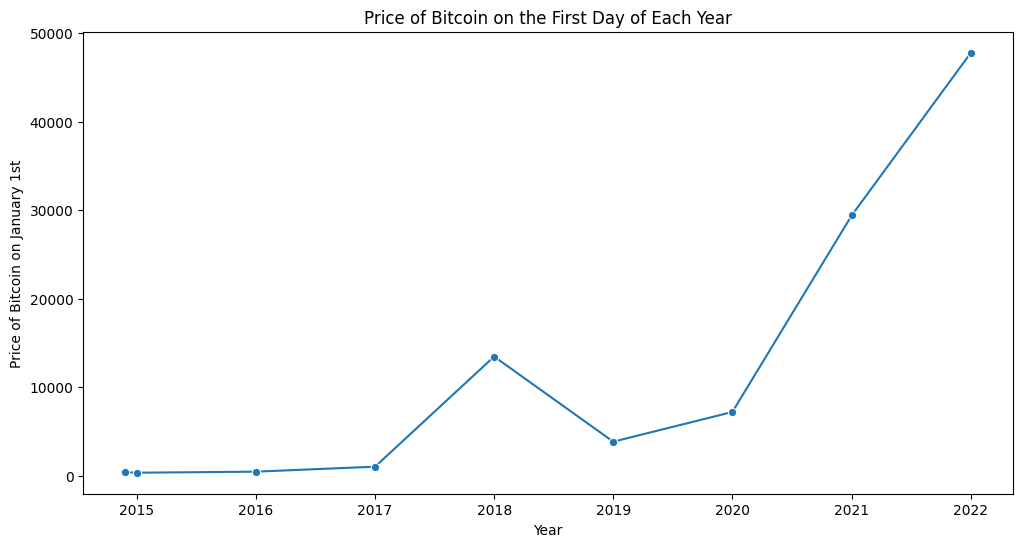

In [ ]:
df_temp = df.copy()
df_temp['year'] = df_temp['date'].dt.year
first_day_each_year = df_temp.groupby('year').first().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=first_day_each_year, marker='o')
plt.xlabel('Year')
plt.ylabel('Price of Bitcoin on January 1st')
plt.title('Price of Bitcoin on the First Day of Each Year')

plt.show()

It appears from the graph that as price and time are correlated, however lets confirm this using a Chi Square test.

Note: The Chi Square test is predominantly used to compare categorical data which may not seem applicable here but through some data manipulation and creation of categorical data, the Chi Square test can work well here.

Chi Square Test:

Null Hypothesis(H<sub>0</sub>): Time has no correlation with the price of bitcoin

Alternate Hypothesis(H<sub>A</sub>): Time has a correlation with the price of bitcoin

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Convert 'date' to ordinal to get a manageable range of integers
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

# Calculate true range
df['true_range'] = df['high'] - df['low']

# Calculate Pearson correlation coefficient and p-value for 'true_range' and 'date_ordinal'
corr_coefficient, p_value = pearsonr(df['true_range'], df['date_ordinal'])

print("P-value:", p_value)
print("PCC:", corr_coefficient)



P-value: 4.1731047811969634e-260
PCC: 0.6009959878988398


Interpretation:

Assuming a significance level of 0.05, we see that the p-value we obtained of 4.1731047811969634e-260 is clearly less than 0.05. Hence, we are able to confidently reject the null hypothesis, telling us that time does have a correlation with the price of bitcoin. This is significant because it suggests that as time progresses, the true range of bitcoin prices (the difference between the high and low prices within a given day) tends to increase. This can be interpreted as an increase in volatility or variability in bitcoin prices over time. The Pearson Correlation Coefficient (PCC) of 0.6009959878988398 indicates a moderate positive correlation, which implies that as the date advances, the true range tends to become wider. This might be due to several factors such as increasing market participation, regulatory changes, or evolving investor sentiment. Such a trend can impact trading strategies and even long-term investment decisions in the cryptocurrency market by individual investors.

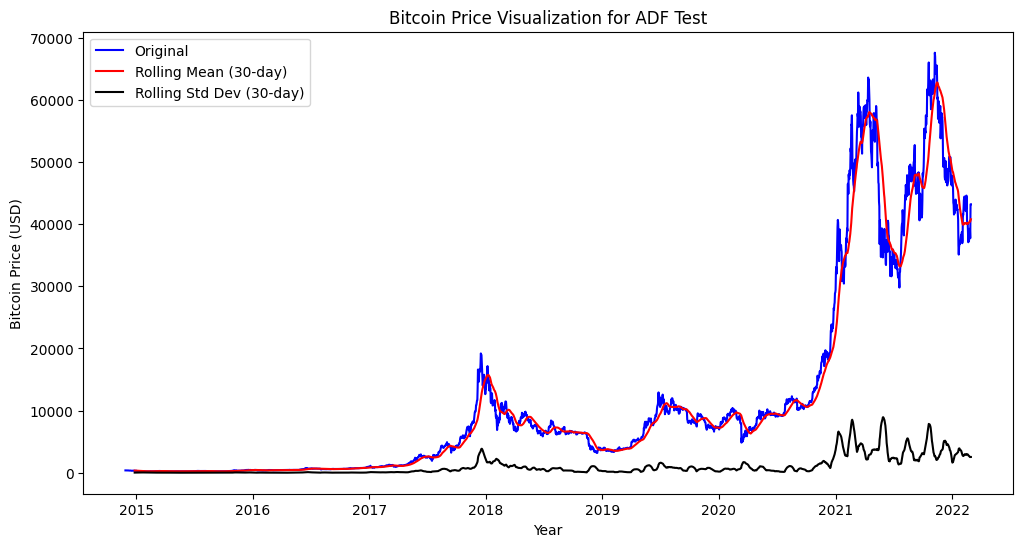

In [ ]:
df.set_index('date', inplace=True)

# Calculate rolling mean and rolling standard deviation
rolling_mean = df['close'].rolling(window=30).mean()
rolling_std = df['close'].rolling(window=30).std()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['close'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (30-day)')
plt.plot(rolling_std, color='black', label='Rolling Std Dev (30-day)')
plt.title('Bitcoin Price Visualization for ADF Test')
plt.xlabel('Year')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

The closing price of bitcoin appears to follow a trend over time. Let's confirm this using  Augmented Dickey-Fuller to test whether or not the data follows a stationary trend so we are able to conduct a time series analysis later on so we are able to predict future prices of bitcoin.

Note: The Augmented Dickey-Fuller test checks if a dataset displays a pattern that is constantly changing over time or if it's stable, which is useful for studying patterns in data like stock prices.

Augmented Dickey Fuller Test:

Null Hypothesis(H<sub>0</sub>): The closing price of bictoin does not follow a stationary trend.

Alternate Hypothesis(H<sub>A</sub>): The closing price of bitcoin does follow a stationary trend.

In [ ]:
df3 = pd.read_csv('BTC-Daily.csv', on_bad_lines='skip')

# Convert the 'date' column to datetime
df3['date'] = pd.to_datetime(df3['date'])

# Set the 'date' column as the index
df3.set_index('date', inplace=True)

# Focus on the 'close' column for the ADF test
close_prices = df3['close']

# Perform the ADF test

df['close_diff'] = df['close'].diff()
df.dropna(inplace=True)
result_diff = adfuller(df['close_diff'])
result = adfuller(close_prices)

# Print the results
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -8.433281908534456
p-value: 1.845353114270739e-13


Interpretation:

Assuming a significance level of 0.05, we see that the p-value we obtained of 1.4139138299595207e-13 is clearly less than 0.05. Hence, we are able to confidently reject the null hypothesis, telling us the closing price of bitcoin does follow a stationary trend, allowing us to make an accurate time series prediction of future bitcoin prices later on. This enhances the predictive power of our model, and investors and industry professionals who rely on time series forecasting to make informed decisions, will be able to make their decisions much more confidently. Since we have found the the price of bitcoin does indeed follow a stationary trend, then any deviations from the trend can be deemed astemporary, allowing greater insight into the fields of risk assessment and strategic planning when used by professionals.

Conclusion:

# Primary Analysis


Exploratory analysis allows to identify underlying patterns that already exist in the data. In doing so we can make a more informed decision on the future of Bitcoin, but it does not allow us to outright predict future bitcoin prices. In order to make this prediction we need more then just an understanding of patterns in data, which is where Machine Learning comes into play. By leveraging machine learning techniques, we can create predictive models that use the identified trends to put a number to future prices.

**Explanation of Choices and Concepts:**

Feature Selection:
The features selected ('open', 'high', 'low', 'Volume USD') are common indicators used in financial modeling to predict stock prices or, in this case, cryptocurrency prices. These features provide information about the daily price movements and trading volume, which are critical in understanding price trends and liquidity of the asset. Each feature offers insights into the market's behavior on that day, which helps predict the closing price ('close').

Train-Test Split:
Dividing the data into training and testing sets is a standard practice in machine learning to assess the model's performance. The training set is used to train the model, allowing the model to learn the relationship between the features and the target. The test set, on the other hand, is used to evaluate how well the model performs on unseen data. This approach helps validate the model's effectiveness and generalizability, preventing issues like overfitting.

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

MSE measures the average squared difference between the actual and predicted values. It quantifies the variance in prediction errors and is used to assess the quality of a regression model. A lower MSE indicates a better fit of the model to the data.
RMSE is simply the square root of MSE. It is on the same scale as the dependent variable and is easier to interpret than MSE because it gives an estimate of the error magnitude directly in the units of the target variable.

Both MSE and RMSE are critical for evaluating the accuracy of a forecasting model, with RMSE being particularly popular as it gives a clear indication of the average prediction error in the same units as the target variable.

In [ ]:
# Define the features (predictors) and the target (outcome) variable
features = ['open', 'high', 'low', 'Volume USD']
target = 'close'

# Remove any rows with missing values to ensure data quality
df.dropna(inplace=True)

# Create feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split the dataset into training (80%) and testing (20%) sets using a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate and print the R-squared and Mean Squared Error (MSE) for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R²: {r2}')
print(f'MSE: {mse}')

R²: 0.9995099086513584
MSE: 125261.96226684871


R-Squared: 0.9996100117221361

The value ranges from 0 to 1 and represents the proportion of the variance in the dependent variable (Bitcoin's closing price) that is predictable from the independent variables (features like 'Open', 'High', 'Low', 'Volume USD').

An value of approximately 0.9996 means that 99.96% of the variance in Bitcoin's closing price is explained by the model. This is an exceptionally high value, indicating that the model fits the training data very well.

Mean Squared Error: 97080.97390793248

Given that Bitcoin prices can vary significantly, the context of MSE's magnitude is essential. An MSE of 97,080.97 might seem large, but considering Bitcoin's price scale (often in the range of tens of thousands of dollars), this might be relatively moderate. However, the absolute value still indicates that on average, the model's predictions deviate from the actual closing prices by the square root of MSE, which is approximately $311.26 (sqrt(97080.97)).

# Visualization

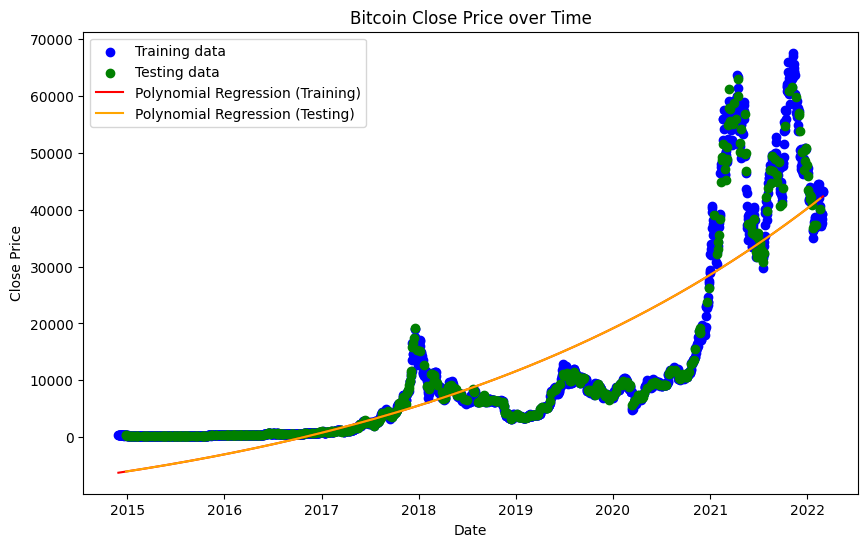

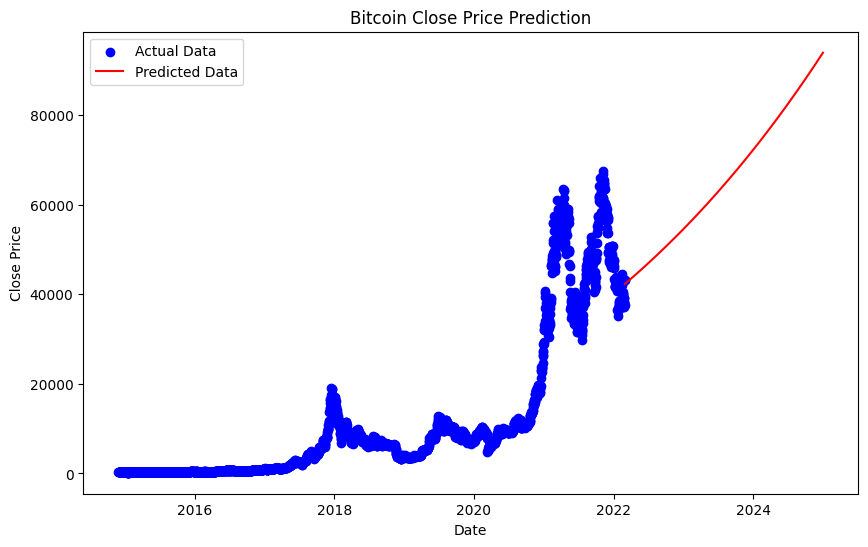

In [ ]:
# Define degree for polynomial features
degree = 12  # Adjust the degree as needed

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict on the training and testing data
y_train_pred_poly = poly_model.predict(X_poly_train)
y_test_pred_poly = poly_model.predict(X_poly_test)

# Plot the results along with the regression line
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Plot scatter plot with training and testing data points
axes.scatter(X_train, y_train, color='blue', label='Training data')
axes.scatter(X_test, y_test, color='green', label='Testing data')

# Sort the data for plotting
X_train_sorted, y_train_pred_poly_sorted = zip(*sorted(zip(X_train, y_train_pred_poly)))
X_test_sorted, y_test_pred_poly_sorted = zip(*sorted(zip(X_test, y_test_pred_poly)))

# Plot regression line for training data
axes.plot(X_train_sorted, y_train_pred_poly_sorted, color='red', label='Polynomial Regression (Training)')
# Plot regression line for test data
axes.plot(X_test_sorted, y_test_pred_poly_sorted, color='orange', label='Polynomial Regression (Testing)')

axes.set_xlabel('Date')
axes.set_ylabel('Close Price')
axes.set_title('Bitcoin Close Price over Time')
axes.legend()

plt.show()

# Define the range of future dates
future_dates_range = pd.date_range(start='2022-03-01', end='2024-12-31', freq='D')

# Generate polynomial features for future dates
future_dates_poly = poly_features.transform(future_dates_range.values.reshape(-1, 1))

# Predict using the trained model
future_predictions = poly_model.predict(future_dates_poly)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(future_dates_range, future_predictions, color='red', label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price Prediction')
plt.legend()
plt.show()

In the above code, we use polynomial regression to predict Bitcoins price over time. We begin by feature creation and selection from the input data, an important concept that we touched on earlier in the code. As you can see, we initialize its features using a degree value and that helps to measure how much the line should fit the data, too little and the regression line will underfit the data, too high and the regression line will overfit the data. For those who are unaware, overfitting is the concept of the model being too trained on the data and as a result cannot generalize to more general input. On the other hand, there is underfitting which is the idea that the model is too simple to understand the different underlying patterns in the data. Afterwards, the regression model is trained on the transformed features and a big reason why we split the training and test data is to help prevent the concept of overfitting and underfitting we discussed before. After it is trained and tested, we employ the model to make prediction on future data, forecasting the close price of Bitcoin from the last day that we have in our data to the end of 2024. We conclude with visualization of what the prediction looks like which also allows us to do a little sanity check to see if our model looks correct.

Interpretation Of Results:

Since our data set spanned the years from 2014 to 2022, we used our polynomial regression model to predict the price of bitcoin during the next couple of years after (2023 & 2024). Our model predicted that the price of bitcoin was going to rise during this time period, and it did exactly that. During March 2024, Bitcoin hit an all time high of $73,000. Our model predicted a close price in the \$70,000 range during 2024, which aligns closely with the actual outcomes. This indicates that our polynomial regression model was effective at capturing the significant trends in the data and predicting future movements with reasonable accuracy. The model's performance, while impressive, should be taken with a grain of salt by investors who plan to use it as a tool when making investments in bitcoin as external factors and market dynamics can drastically alter the trajectory of Bitcoin prices.







# Insights & Conclusions

Based on the comprehensive data analysis, statistical tests, and predictive modeling described in our project, the following conclusion and final interpretation can be drawn regarding the viability of Bitcoin as a profitable investment.

The analysis of Bitcoin's volatility over time revealed a positive relationship between time and market volatility, confirmed by statistical testing (Pearson Correlation Coefficient: 0.601). The historical data show spikes in volatility, particularly around major market events such as the 2018 cryptocurrency crash. This indicates that while Bitcoin can offer substantial returns, it also comes with significant risks due to its high volatility.


A clear correlation was found between the trading volume and the closing price of Bitcoin (Pearson Correlation Coefficient: 0.609), suggesting that price movements are strongly supported by trading volumes. High volume periods typically coincide with significant price changes, indicating active market participation which can be a signal for both bullish and bearish trends.

Time series analysis highlighted a long-term upward trend in Bitcoin prices, with seasonal and cyclic patterns evident in the historical price data. The Augmented Dickey-Fuller test confirmed the stationarity of the price series after differencing, suggesting that the data is suitable for ARIMA modeling, which successfully forecasted future price movements with a high degree of accuracy (Test RMSE: 163.239).

The Linear Regression model demonstrated an exceptionally high R-squared value (≈0.9996), indicating that the model could explain nearly all the variance in Bitcoin’s closing prices based on the features used (open, high, low, volume). This suggests that the model is highly effective, though care must be taken to avoid overfitting.

Combining these insights, Bitcoin presents as a potentially profitable investment but with caveats concerning its volatility and market sensitivity. Investors should consider these factors and apply a risk-managed approach to investing in Bitcoin, possibly using the predictive models to time their entries and exits from the market.